In [1]:

import random

import matplotlib.pyplot as plt
import networkx as nx
    
import matplotlib.pyplot as plt
    

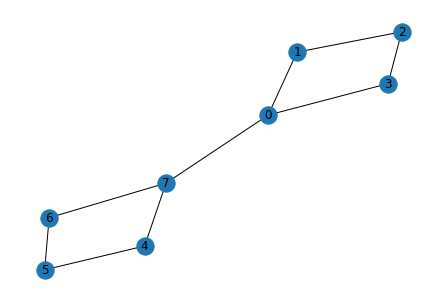

In [2]:

G = nx.Graph()
nx.add_cycle(G,[0, 1, 2, 3])
nx.add_cycle(G,[4, 5, 6, 7])
G.add_edge(0, 7)
nx.draw(G, with_labels=True)  



In [3]:

partition = [
    {1, 2, 3},
    {4, 5, 6},
    {0, 7},
]


In [4]:

nx.community.is_partition(G, partition)
partition_map = {}
for idx, cluster_nodes in enumerate(partition):
    for node in cluster_nodes:
        partition_map[node] = idx

partition_map
print(partition_map)

print(partition_map[0] == partition_map[7])


{1: 0, 2: 0, 3: 0, 4: 1, 5: 1, 6: 1, 0: 2, 7: 2}
True


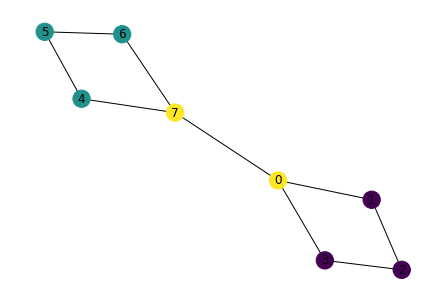

In [5]:

node_colors = [partition_map[n] for n in G.nodes]
        
nx.draw(G, node_color=node_colors, with_labels=True)




In [6]:

def modularity(G, partition):
    W = sum(G.edges[v, w].get('weight', 1) for v, w in G.edges)
    summation = 0
    for cluster_nodes in partition:
        s_c = sum(G.degree(n, weight='weight') for n in cluster_nodes)
        # Use subgraph to count only internal links
        C = G.subgraph(cluster_nodes)
        W_c = sum(C.edges[v, w].get('weight', 1) for v, w in C.edges)
        summation += W_c - s_c ** 2 / (4 * W)
    
    return summation / W


modularity(G, partition)

0.2222222222222222

In [7]:

partition_2 = [
    {0, 1, 2, 3},
    {4, 5, 6, 7},
]
print(modularity(G, partition_2))

print(nx.community.quality.modularity(G, partition_2))


0.3888888888888889
0.38888888888888884


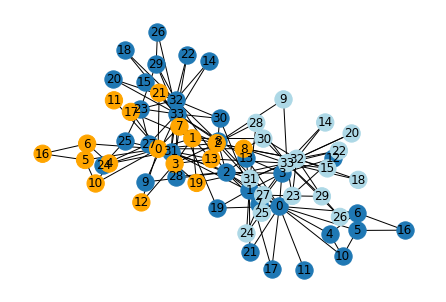

In [8]:

K = nx.karate_club_graph()
nx.draw(K, with_labels=True)

K.nodes[0]


K.nodes[9]


K = nx.karate_club_graph()
club_color = {
    'Mr. Hi': 'orange',
    'Officer': 'lightblue',
}
node_colors = [club_color[K.nodes[n]['club']] for n in K.nodes]
nx.draw(K, node_color=node_colors, with_labels=True)



In [9]:

groups = {
    'Mr. Hi': set(),
    'Officer': set(),
}

for n in K.nodes:
    club = K.nodes[n]['club']
    groups[club].add(n)
    
print(groups)


empirical_partition = list(groups.values())
print(empirical_partition)


{'Mr. Hi': {0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 16, 17, 19, 21}, 'Officer': {32, 33, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}}
[{0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 16, 17, 19, 21}, {32, 33, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}]


In [10]:

print(nx.community.is_partition(K, empirical_partition))

print(nx.community.quality.modularity(K, empirical_partition))


True
0.39143756676224206


{(0, 1): 0.025252525252525245, (0, 2): 0.0777876807288572, (0, 3): 0.02049910873440285, (0, 4): 0.0522875816993464, (0, 5): 0.07813428401663694, (0, 6): 0.07813428401663695, (0, 7): 0.0228206434088787, (0, 8): 0.07423959482783014, (0, 10): 0.0522875816993464, (0, 11): 0.058823529411764705, (0, 12): 0.04652406417112298, (0, 13): 0.04237189825425121, (0, 17): 0.04012392835922248, (0, 19): 0.045936960642843, (0, 21): 0.040123928359222474, (0, 31): 0.1272599949070537, (1, 2): 0.023232323232323233, (1, 3): 0.0077243018419489, (1, 7): 0.007422969187675069, (1, 13): 0.01240556828792123, (1, 17): 0.01869960105254222, (1, 19): 0.014633732280791102, (1, 21): 0.01869960105254222, (1, 30): 0.032280791104320514, (2, 3): 0.022430184194890075, (2, 7): 0.025214328155504617, (2, 8): 0.009175791528732704, (2, 9): 0.030803836686189627, (2, 13): 0.007630931160342923, (2, 27): 0.04119203236850296, (2, 28): 0.02278244631185807, (2, 32): 0.06898678663384543, (3, 7): 0.003365588659706307, (3, 12): 0.012299465

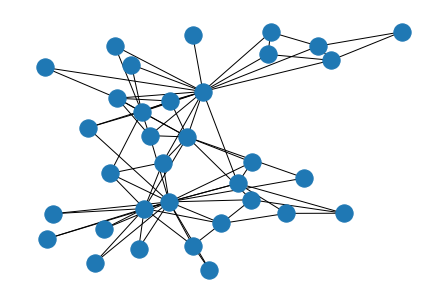

In [11]:

G = nx.karate_club_graph()
nx.draw(G)

print(nx.edge_betweenness_centrality(G))

my_edge_betweenness = nx.edge_betweenness_centrality(G)
my_edge_betweenness[0, 1]


my_edge_betweenness.get((0, 1))

print(max(my_edge_betweenness, key=my_edge_betweenness.get))
print(max(G.edges(), key=my_edge_betweenness.get))


In [12]:

my_edge_betweenness = nx.edge_betweenness_centrality(G)
most_valuable_edge = max(G.edges(), key=my_edge_betweenness.get)
G.remove_edge(*most_valuable_edge)

nx.connected_components(G)
print(list(nx.connected_components(G)))



[{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}]


In [13]:

G = nx.karate_club_graph()
partition_sequence = []
for _ in range(G.number_of_edges()):
    my_edge_betweenness = nx.edge_betweenness_centrality(G)
    most_valuable_edge = max(G.edges(), key=my_edge_betweenness.get)
    G.remove_edge(*most_valuable_edge)
    my_partition = list(nx.connected_components(G))
    partition_sequence.append(my_partition)



len(partition_sequence), nx.karate_club_graph().number_of_edges()
len(partition_sequence[0])

len(partition_sequence[-1]), nx.karate_club_graph().number_of_nodes

G = nx.karate_club_graph()
modularity_sequence = [modularity(G, p) for p in partition_sequence]
modularity_sequence


[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.34766027623170476,
 0.34766027623170476,
 0.34766027623170476,
 0.3423192968647515,
 0.3423192968647515,
 0.3423192968647515,
 0.3423192968647515,
 0.3580611307884035,
 0.3580611307884035,
 0.3580611307884035,
 0.3580611307884035,
 0.3580611307884035,
 0.3580611307884035,
 0.38497217068645645,
 0.37578006409175246,
 0.37578006409175246,
 0.3594760218136842,
 0.3594760218136842,
 0.3470699574595679,
 0.3470699574595679,
 0.333249002080171,
 0.333249002080171,
 0.3134405277262421,
 0.3134405277262421,
 0.3122598901819681,
 0.3122598901819681,
 0.3036862127771219,
 0.3036862127771219,
 0.2942973332583722,
 0.2942973332583722,
 0.2827158411573995,
 0.2827158411573995,
 0.27116245947414774,
 0.27116245947414774,
 0.2544648713479881,
 0.2544648713479881,
 0.2397537527407657,
 0.2397537527407657,
 0.22689792170311643,
 0.22299057363992422,
 0.22299057363992422,
 0.22299057363992422,
 0.20056783043796034,
 0.20056783043796034,
 0.1

Text(0.5, 0, 'Algorithm step')

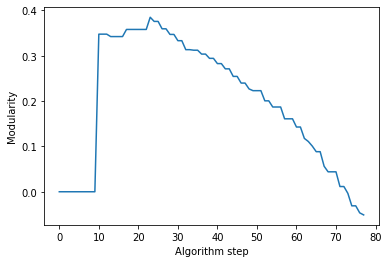

In [14]:

plt.plot(modularity_sequence)
plt.ylabel('Modularity')
plt.xlabel('Algorithm step')


In [15]:

def my_modularity(partition):
    return nx.community.quality.modularity(G, partition)
best_partition = max(partition_sequence, key=my_modularity)

best_partition

def create_partition_map(partition):
    partition_map = {}
    for idx, cluster_nodes in enumerate(partition):
        for node in cluster_nodes:
            partition_map[node] = idx
    return partition_map



0.3849721706864564

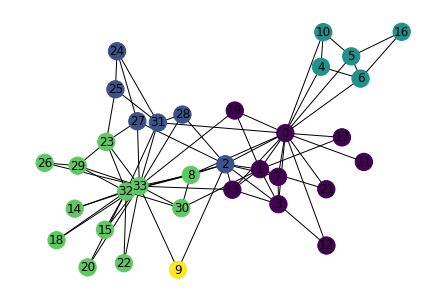

In [16]:

best_partition_map = create_partition_map(best_partition)

node_colors = [best_partition_map[n] for n in G.nodes()]
nx.draw(G, with_labels=True, node_color=node_colors)


nx.community.quality.modularity(G, best_partition)



0.3476602762317048

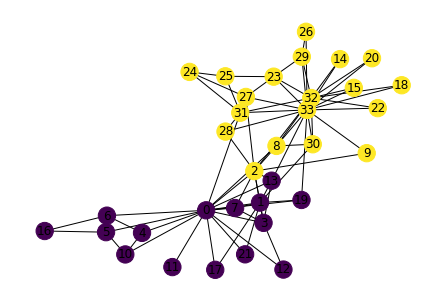

In [17]:

for partition in partition_sequence:
    if len(partition) == 2:
        two_cluster_partition = partition
        break

two_cluster_partition

two_cluster_partition_map = create_partition_map(two_cluster_partition)

node_colors = [two_cluster_partition_map[n] for n in G.nodes()]
nx.draw(G, with_labels=True, node_color=node_colors)

nx.community.quality.modularity(G, two_cluster_partition)



In [18]:

pos = nx.layout.spring_layout(G)
fig = plt.figure(figsize=(15, 6))


<Figure size 1080x432 with 0 Axes>

Text(0.5, 1.0, 'Predicted communities')

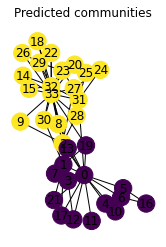

In [19]:

plt.subplot(1, 2, 1)
two_cluster_partition_map = create_partition_map(two_cluster_partition)
node_colors = [two_cluster_partition_map[n] for n in G.nodes()]
nx.draw(G, with_labels=True, node_color=node_colors, pos=pos)
plt.title('Predicted communities')


[({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}, {2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}), ({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}, {32, 33, 2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}, {9}), ({0, 1, 3, 7, 11, 12, 13, 17, 19, 21}, {32, 33, 2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}, {4, 5, 6, 10, 16}, {9}), ({0, 1, 3, 7, 11, 12, 13, 17, 19, 21}, {2, 24, 25, 27, 28, 31}, {4, 5, 6, 10, 16}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 26, 29, 30}, {9}), ({0, 1, 3, 7, 12, 13, 17, 19, 21}, {2, 24, 25, 27, 28, 31}, {4, 5, 6, 10, 16}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 26, 29, 30}, {9}, {11})]


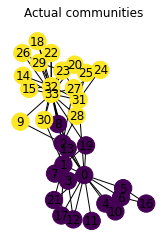

In [20]:

plt.subplot(1, 2, 2)
node_colors = [G.nodes[n]['club'] == 'Officer' for n in G.nodes()]
nx.draw(G, with_labels=True, node_color=node_colors, pos=pos)
plt.title('Actual communities')

G.nodes[8]
print(list(nx.community.girvan_newman(G))[:5])

